# DC House Price 

#### Data source: https://www.redfin.com/blog/data-center

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import and Data Cleaning
### Importing data and creating dataframes for each Washington DC region
#### All required dataset are downloaded in data folder

In [ ]:
# set up name lable to match each csv dataset
lst = []
for i in range(1,83):
    location = 'data/'
    ext = 'data_crosstab ({}).csv'.format(i)
    final = location + ext
    lst.append(final)
    # print(final)

# pull datasets from data folder and clean data such as $1,200K, 1.5%, etc. Change data type from object to float
# create a new list: df_list to include all datasets
df_list = []
i = 0
for location in lst:
    df = pd.read_csv(location, encoding='utf-16', sep='\t')
    df = df.add_suffix('_'+str(i))
    # reformat the median sale prices from strings to floats
    #df["Median Sale Price" + "_"+ str(i)] = df["Median Sale Price" + "_"+ str(i)].str.replace("$", "").str.replace(",", "").str.replace("K","000").str.replace("%","").astype(float)
    for j in range(len(df.columns)-2):
        if df[df.columns[j+2]].dtype == 'object':
            df[df.columns[j+2]] = df[df.columns[j+2]].str.replace("$", "").str.replace(",", "").str.replace("K","000").str.replace("%","").astype(float)
        #df[df.columns[j+2]] = df[df.columns[j+2]].str.replace("$", "").str.replace(",", "").str.replace("K","000").str.replace("%","").astype(float)
    df_list.append(df)
    i += 1
# df_list[0].head()

In [4]:
# review the colnum names 
df.columns

Index(['Region_81', 'Month of Period End_81', 'Median Sale Price_81',
       'Median Sale Price MoM _81', 'Median Sale Price YoY _81',
       'Homes Sold_81', 'Homes Sold MoM _81', 'Homes Sold YoY _81',
       'New Listings_81', 'New Listings MoM _81', 'New Listings YoY _81',
       'Inventory_81', 'Inventory MoM _81', ' Inventory YoY _81',
       'Days on Market_81', 'Days on Market MoM_81', 'Days on Market YoY_81',
       'Average Sale To List_81', 'Average Sale To List MoM _81',
       'Average Sale To List YoY _81'],
      dtype='object')

In [5]:
# Ensure the data type is appropriate for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 20 columns):
Region_81                       94 non-null object
Month of Period End_81          94 non-null object
Median Sale Price_81            94 non-null float64
Median Sale Price MoM _81       94 non-null float64
Median Sale Price YoY _81       94 non-null float64
Homes Sold_81                   94 non-null int64
Homes Sold MoM _81              94 non-null float64
Homes Sold YoY _81              94 non-null float64
New Listings_81                 94 non-null int64
New Listings MoM _81            94 non-null float64
New Listings YoY _81            94 non-null float64
Inventory_81                    94 non-null int64
Inventory MoM _81               94 non-null float64
 Inventory YoY _81              94 non-null float64
Days on Market_81               94 non-null int64
Days on Market MoM_81           94 non-null int64
Days on Market YoY_81           94 non-null int64
Average Sale To List_81    

### Creating dataframe containing median sale prices, Homes Sold MoM and Inventory MoM of each Washington DC region from Feb. 2012 to Oct. 2019 

In [6]:
# Datasets for median sale prices, Homes Sold MoM and Inventory MoM are saved in data folder

final_lst = []
i = 0
for df in df_list:
    final_lst.append(df["Median Sale Price" + "_"+ str(i)][0:93])
    i += 1
A = pd.concat(final_lst, axis = 1)
A.to_csv('data/Median Sale Price.csv')
#Creating dataframe containing homes sold MoM of each Washington DC region from Feb. 2012 to Oct. 2019 
final_lst_2 = []
i = 0
for df in df_list:
    final_lst_2.append(df["Homes Sold MoM " + "_"+ str(i)][0:93])
    i += 1
B = pd.concat(final_lst_2, axis = 1)
B.to_csv('data/Homes Sold MoM.csv')
#Creating dataframe containing inventory MoM of each Washington DC region from Feb. 2012 to Oct. 2019 
final_lst_3 = []
i = 0
for df in df_list:
    final_lst_3.append(df["Inventory MoM " + "_"+ str(i)][0:93])
    i += 1
C = pd.concat(final_lst_3, axis = 1)
C.to_csv('data/Inventory MoM.csv')

In [ ]:
A
B
C

#### Median Sale Price Hypothesis Tests

In [ ]:
# A is the final dataset(panda.dataframe) with only median sale price for each region. Say n regions
# Create a list combine_list containing any two regions out of n region: list(itertools.combinations(range(A.shape[1]), 2))
# Run a loop to perform hypothesis testings: T test, Wilcoxon test, KS test, Mann-Whitney rank test 

import itertools
from statsmodels.stats.weightstats import ttest_ind as t_test
from scipy.stats import wilcoxon
from scipy.stats import ks_2samp 
from scipy.stats import mannwhitneyu

 
combine_list = list(itertools.combinations(range(A.shape[1]), 2))
#statistic, p-value, degree of freedom for two-sample t test
t_stat = []
p_val_t = []
df = []

# statistic and p-value for Wilcoxon test 
non_stat = []
p_val_wc = []

# statistic and p-value for KS test 
ks_stat = []
p_val_ks = []

# statistic and p-value for Mann-Whitney rank test  test 
mu_stat = []
p_val_mu = []

for i in range(len(combine_list)):
    temp1, temp2, temp3 = t_test(A.iloc[:,combine_list[i][0]], A.iloc[:,combine_list[i][1]], alternative = "two-sided", usevar = "unequal")
    t_stat.append(float(temp1)) 
    p_val_t.append(float(temp2))
    df.append(float(temp3))
    temp4, temp5 = wilcoxon(A.iloc[:,combine_list[i][0]], A.iloc[:,combine_list[i][1]], alternative = "two-sided", zero_method = "zsplit")
    non_stat.append(float(temp4))
    p_val_wc.append(float(temp5)) 
    temp6, temp7 = ks_2samp(A.iloc[:,combine_list[i][0]], A.iloc[:,combine_list[i][1]], alternative = "two-sided", mode = 'asymp')
    ks_stat.append(float(temp6))
    p_val_ks.append(float(temp7))
    temp8, temp9 = mannwhitneyu(A.iloc[:,combine_list[i][0]], A.iloc[:,combine_list[i][1]], alternative = "two-sided")
    mu_stat.append(float(temp8))
    p_val_mu.append(float(temp9))

test_matrix = pd.DataFrame(list(zip(combine_list, t_stat, p_val_t, df, non_stat, p_val_wc, ks_stat, p_val_ks, mu_stat, p_val_mu)), 
               columns =['combinatory', 'Stat_ttest', 'p_ttest', 'df_ttest', 'Stat_wctest', 'p_wctest', 'Stat_kstest', 'p_kstest', 'Stat_mutest', 'p_mutest'])

In [7]:
test_matrix

,combinatory,Stat_ttest,p_ttest,df_ttest,Stat_wctest,p_wctest,Stat_kstest,p_kstest,Stat_mutest,p_mutest
0,"(0, 1)",-44.211365,1.392565e-92,162.733911,0.0,5.565426e-17,1.000000,8.159117e-41,0.0,5.023770e-32
1,"(0, 2)",22.639833,9.024331e-49,140.788533,0.0,5.562522e-17,0.924731,5.793541e-35,8619.0,1.320081e-31
2,"(0, 3)",-35.756287,2.704627e-67,124.381542,0.0,5.567241e-17,1.000000,8.159117e-41,0.0,5.019844e-32
3,"(0, 4)",32.808925,1.959838e-75,169.926156,0.0,5.562159e-17,1.000000,8.159117e-41,8649.0,5.025079e-32
4,"(0, 5)",30.579648,2.762020e-67,153.930360,0.0,5.562522e-17,1.000000,8.159117e-41,8649.0,5.014940e-32
...,...,...,...,...,...,...,...,...,...,...
3316,"(78, 80)",-1.194416,2.342584e-01,145.523201,2029.5,5.500174e-01,0.236559,1.098577e-02,4399.5,8.391812e-01
3317,"(78, 81)",10.479537,1.445043e-19,147.984082,39.0,1.956860e-16,0.752688,2.623298e-23,8024.5,6.933220e-24
3318,"(79, 80)",14.377349,1.287231e-31,178.194568,24.0,1.210574e-16,0.763441,5.759717e-24,7987.5,1.928951e-23
3319,"(79, 81)",30.080162,9.041485e-58,120.159329,0.0,5.569784e-17,1.000000,8.159117e-41,8649.0,5.029665e-32


In [8]:
# Create a function to detect the hypothesis testing results. 0: reject null, 1: fail to reject null
def test_p_value(p = .05, name = 'ttest'):
    name_list = []
    for i in range(len(test_matrix)):
        if test_matrix["p_" + name][i] < p:
            name_list.append(0) 
        else:
            name_list.append(1)   
    test_matrix['index_' + name] = name_list

In [ ]:
test_p_value(p = .05, name = 'ttest')
test_p_value(p = .05, name = 'wctest')
test_p_value(p = .05, name = 'kstest')
test_p_value(p = .05, name = 'mutest')
#test_matrix
#test_matrix.shape

In [9]:
# Save the final testing results in data folder
test_matrix.to_csv('data/TM_Median Sale Price.csv')

#### Homes Sold MoM Hypothesis Tests

In [11]:
# B is the final dataset(panda.dataframe) with only homes sold MoM for each region. Say n regions
# Create a list combine_list containing any two regions out of n region: list(itertools.combinations(range(A.shape[1]), 2))
# Run a loop to perform hypothesis testings: T test, Wilcoxon test, KS test, Mann-Whitney rank test 

import itertools
from statsmodels.stats.weightstats import ttest_ind as t_test
from scipy.stats import wilcoxon
from scipy.stats import ks_2samp 
from scipy.stats import mannwhitneyu

combine_list = list(itertools.combinations(range(B.shape[1]), 2))

#statistic, p-value, degree of freedom for two-sample t test
t_stat = []
p_val_t = []
df = []

# statistic and p-value for Wilcoxon test 
non_stat = []
p_val_wc = []

# statistic and p-value for KS test 
ks_stat = []
p_val_ks = []

# statistic and p-value for Mann-Whitney rank test  test 
mu_stat = []
p_val_mu = []

for i in range(len(combine_list)):
    temp1, temp2, temp3 = t_test(B.iloc[:,combine_list[i][0]], B.iloc[:,combine_list[i][1]], alternative = "two-sided", usevar = "unequal")
    t_stat.append(float(temp1)) 
    p_val_t.append(float(temp2))
    df.append(float(temp3))
    temp4, temp5 = wilcoxon(B.iloc[:,combine_list[i][0]], B.iloc[:,combine_list[i][1]], alternative = "two-sided", zero_method = "zsplit")
    non_stat.append(float(temp4))
    p_val_wc.append(float(temp5)) 
    temp6, temp7 = ks_2samp(B.iloc[:,combine_list[i][0]], B.iloc[:,combine_list[i][1]], alternative = "two-sided", mode = 'asymp')
    ks_stat.append(float(temp6))
    p_val_ks.append(float(temp7))
    temp8, temp9 = mannwhitneyu(B.iloc[:,combine_list[i][0]], B.iloc[:,combine_list[i][1]], alternative = "two-sided")
    mu_stat.append(float(temp8))
    p_val_mu.append(float(temp9))

test_matrix_2 = pd.DataFrame(list(zip(combine_list, t_stat, p_val_t, df, non_stat, p_val_wc, ks_stat, p_val_ks, mu_stat, p_val_mu)), 
               columns =['combinatory', 'Stat_ttest', 'p_ttest', 'df_ttest', 'Stat_wctest', 'p_wctest', 'Stat_kstest', 'p_kstest', 'Stat_mutest', 'p_mutest'])

In [12]:
test_matrix_2

,combinatory,Stat_ttest,p_ttest,df_ttest,Stat_wctest,p_wctest,Stat_kstest,p_kstest,Stat_mutest,p_mutest
0,"(0, 1)",-0.575799,0.565624,148.242561,2073.0,0.666427,0.150538,0.242640,4435.5,0.763411
1,"(0, 2)",-1.165239,0.246232,120.072994,1989.0,0.451501,0.150538,0.242640,4371.5,0.899159
2,"(0, 3)",-1.437349,0.153796,98.259635,2011.0,0.503741,0.258065,0.004085,4448.0,0.737469
3,"(0, 4)",-1.643313,0.103096,113.072931,1967.5,0.403554,0.247312,0.006772,4278.0,0.900264
4,"(0, 5)",-0.357912,0.720828,180.417773,2032.5,0.557717,0.107527,0.655429,4194.0,0.723249
...,...,...,...,...,...,...,...,...,...,...
3316,"(78, 80)",-0.068512,0.945455,177.360534,2105.5,0.759202,0.075269,0.954821,4373.5,0.894866
3317,"(78, 81)",0.166414,0.868020,177.251494,2149.0,0.888775,0.139785,0.323565,4227.0,0.791554
3318,"(79, 80)",-0.147620,0.882807,180.650459,2122.5,0.809252,0.075269,0.954821,4285.0,0.915343
3319,"(79, 81)",0.063315,0.949588,173.086399,2148.0,0.885749,0.118280,0.533508,4164.5,0.663752


In [13]:
test_matrix_2['p_ttest'][0]

0.5656239740981964

In [14]:
# Create a function to detect the hypothesis testing results. 0: reject null, 1: fail to reject null
def test_p_value_2(p = .05, name = 'ttest'):
    name_list = []
    for i in range(len(test_matrix_2)):
        if test_matrix_2["p_" + name][i] < p:
            name_list.append(0) 
        else:
            name_list.append(1)   
    test_matrix_2['index_' + name] = name_list

In [ ]:
test_p_value_2(p = .05, name = 'ttest')
test_p_value_2(p = .05, name = 'wctest')
test_p_value_2(p = .05, name = 'kstest')
test_p_value_2(p = .05, name = 'mutest')
#(test_matrix_2.index_wctest == 1)

In [15]:
# Save the final testing results in data folder
test_matrix_2.to_csv('data/TM_Homes Sold MoM.csv')

#### Inventory MoM Hypothesis Tests

In [16]:
# C is the final dataset(panda.dataframe) with only inventory MoM for each region. Say n regions
# Create a list combine_list containing any two regions out of n region: list(itertools.combinations(range(A.shape[1]), 2))
# Run a loop to perform hypothesis testings: T test, Wilcoxon test, KS test, Mann-Whitney rank test 
import itertools
from statsmodels.stats.weightstats import ttest_ind as t_test
from scipy.stats import wilcoxon
from scipy.stats import ks_2samp 
from scipy.stats import mannwhitneyu
combine_list = list(itertools.combinations(range(C.shape[1]), 2))
#statistic, p-value, degree of freedom for two-sample t test
t_stat = []
p_val_t = []
df = []
# statistic and p-value for Wilcoxon test 
non_stat = []
p_val_wc = []
# statistic and p-value for KS test 
ks_stat = []
p_val_ks = []
# statistic and p-value for Mann-Whitney rank test  test 
mu_stat = []
p_val_mu = []
for i in range(len(combine_list)):
    temp1, temp2, temp3 = t_test(C.iloc[:,combine_list[i][0]], C.iloc[:,combine_list[i][1]], alternative = "two-sided", usevar = "unequal")
    t_stat.append(float(temp1)) 
    p_val_t.append(float(temp2))
    df.append(float(temp3))
    temp4, temp5 = wilcoxon(C.iloc[:,combine_list[i][0]], C.iloc[:,combine_list[i][1]], alternative = "two-sided", zero_method = "zsplit")
    non_stat.append(float(temp4))
    p_val_wc.append(float(temp5)) 
    temp6, temp7 = ks_2samp(C.iloc[:,combine_list[i][0]], C.iloc[:,combine_list[i][1]], alternative = "two-sided", mode = 'asymp')
    ks_stat.append(float(temp6))
    p_val_ks.append(float(temp7))
    temp8, temp9 = mannwhitneyu(C.iloc[:,combine_list[i][0]], C.iloc[:,combine_list[i][1]], alternative = "two-sided")
    mu_stat.append(float(temp8))
    p_val_mu.append(float(temp9))
test_matrix_3 = pd.DataFrame(list(zip(combine_list, t_stat, p_val_t, df, non_stat, p_val_wc, ks_stat, p_val_ks, mu_stat, p_val_mu)), 
               columns =['combinatory', 'Stat_ttest', 'p_ttest', 'df_ttest', 'Stat_wctest', 'p_wctest', 'Stat_kstest', 'p_kstest', 'Stat_mutest', 'p_mutest'])

In [17]:
test_matrix_3

,combinatory,Stat_ttest,p_ttest,df_ttest,Stat_wctest,p_wctest,Stat_kstest,p_kstest,Stat_mutest,p_mutest
0,"(0, 1)",-0.643420,0.520900,155.402703,2146.5,0.881213,0.150538,0.242640,4445.5,0.742701
1,"(0, 2)",-0.491520,0.623709,165.862372,1992.5,0.459603,0.118280,0.533508,4376.5,0.888330
2,"(0, 3)",NaN,NaN,NaN,1829.0,0.171950,0.258065,0.004085,4103.0,0.546987
3,"(0, 4)",-0.513347,0.608559,133.225851,2125.5,0.818172,0.139785,0.323565,4550.5,0.539014
4,"(0, 5)",0.465767,0.642011,161.160468,2066.0,0.647040,0.129032,0.421098,4418.5,0.798953
...,...,...,...,...,...,...,...,...,...,...
3316,"(78, 80)",-0.796699,0.426871,151.696854,2071.5,0.662253,0.193548,0.061375,4266.0,0.874395
3317,"(78, 81)",0.158545,0.874206,179.316750,2172.5,0.960273,0.118280,0.533508,4397.5,0.843377
3318,"(79, 80)",-0.583770,0.560146,170.514204,2035.0,0.564170,0.139785,0.323565,4222.0,0.781010
3319,"(79, 81)",0.361701,0.718043,163.223351,2161.0,0.925209,0.150538,0.242640,4269.0,0.880852


In [18]:
test_matrix_3['p_ttest'][0]

0.5209002558020271

In [19]:
# Create a function to detect the hypothesis testing results. 0: reject null, 1: fail to reject null

def test_p_value_3(p = .05, name = 'ttest'):
    name_list = []
    for i in range(len(test_matrix_3)):
        if test_matrix_3["p_" + name][i] < p:
            name_list.append(0) 
        else:
            name_list.append(1)   
    test_matrix_3['index_' + name] = name_list
test_p_value_3(p = .05, name = 'ttest')
test_p_value_3(p = .05, name = 'wctest')
test_p_value_3(p = .05, name = 'kstest')
test_p_value_3(p = .05, name = 'mutest')
test_matrix_3
test_matrix_3.to_csv('data/TM_Inventory MoM.csv')

In [21]:
test_matrix[3316:3319]

,combinatory,Stat_ttest,p_ttest,df_ttest,Stat_wctest,p_wctest,Stat_kstest,p_kstest,Stat_mutest,p_mutest,index_ttest,index_wctest,index_kstest,index_mutest
3316,"(78, 80)",-1.194416,2.342584e-01,145.523201,2029.5,5.500174e-01,0.236559,1.098577e-02,4399.5,8.391812e-01,1,1,0,1
3317,"(78, 81)",10.479537,1.445043e-19,147.984082,39.0,1.956860e-16,0.752688,2.623298e-23,8024.5,6.933220e-24,0,0,0,0
3318,"(79, 80)",14.377349,1.287231e-31,178.194568,24.0,1.210574e-16,0.763441,5.759717e-24,7987.5,1.928951e-23,0,0,0,0


In [22]:
df_list[78:79][0][0:1]
df_list[80:81][0][0:1]
df_list[81:82][0][0:1]

,Region_81,Month of Period End_81,Median Sale Price_81,Median Sale Price MoM _81,Median Sale Price YoY _81,Homes Sold_81,Homes Sold MoM _81,Homes Sold YoY _81,New Listings_81,New Listings MoM _81,New Listings YoY _81,Inventory_81,Inventory MoM _81,Inventory YoY _81,Days on Market_81,Days on Market MoM_81,Days on Market YoY_81,Average Sale To List_81,Average Sale To List MoM _81,Average Sale To List YoY _81
0,"Washington, DC - Woodridge-Fort Lincoln",February 2012,300000.0,-1.5,-10.5,17,-5.6,13.3,15,-16.7,-21.1,21,-12.5,-12.5,78,22,-37,96.8,0.5,2.4


In [24]:
A.shape

(93, 82)

In [25]:
A['Median Sale Price_78']

0     790000.0
1     780000.0
2     436000.0
3     489000.0
4     599000.0
        ...   
88    585000.0
89    643000.0
90    552000.0
91    643000.0
92    625000.0
Name: Median Sale Price_78, Length: 93, dtype: float64

TypeError: list indices must be integers or slices, not str

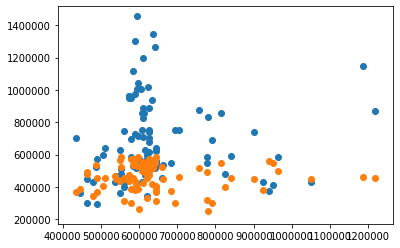

In [26]:
plt.scatter(A['Median Sale Price_78'], A['Median Sale Price_80'])
plt.scatter(A['Median Sale Price_78'], A['Median Sale Price_81'])
sns.lineplot(df['Month of Period End_81'], A['Median Sale Price_78'])
sns.lineplot(df['Month of Period End_81'], A['Median Sale Price_80'])
#sns.lineplot(df['Month of Period End_81'], A['Median Sale Price_81'])
plt.legend()